<p><center><h3> Tutorial 2: NLTK</h3></center>
<center>R Abhijit Srivathsan - 2448044</center></p>

## The Story

> Once upon a time in a small village, there lived a curious cat named Whiskers. Every morning, Whiskers explored the narrow lanes, chasing butterflies and peeking into gardens. One sunny day, Whiskers discovered an old library hidden behind tall bushes. Inside, dust-covered books whispered stories of ancient lands and brave heroes. Excited, Whiskers spent hours jumping from shelf to shelf, knocking down books and unrolling scrolls. From that day on, the little cat visited the hidden library daily, lost in tales of adventure.

In [1]:
# Import necessary libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, FreqDist

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# The story text
story = """Once upon a time in a small village, there lived a curious cat named Whiskers. Every morning, Whiskers explored the narrow lanes, chasing butterflies and peeking into gardens. One sunny day, Whiskers discovered an old library hidden behind tall bushes. Inside, dust-covered books whispered stories of ancient lands and brave heroes. Excited, Whiskers spent hours jumping from shelf to shelf, knocking down books and unrolling scrolls. From that day on, the little cat visited the hidden library daily, lost in tales of adventure."""

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 1. Tokenize the Story into Sentences and Words

Tokenization is the process of splitting the text into meaningful units (sentences and words).

In [2]:
# Sentence tokenization
sentences = sent_tokenize(story)
print("Sentences in the story:\n")
for i, sent in enumerate(sentences, 1):
    print(f"{i}: {sent}")

# Word tokenization
words = word_tokenize(story)
print("\nWord tokens:\n", words)

Sentences in the story:

1: Once upon a time in a small village, there lived a curious cat named Whiskers.
2: Every morning, Whiskers explored the narrow lanes, chasing butterflies and peeking into gardens.
3: One sunny day, Whiskers discovered an old library hidden behind tall bushes.
4: Inside, dust-covered books whispered stories of ancient lands and brave heroes.
5: Excited, Whiskers spent hours jumping from shelf to shelf, knocking down books and unrolling scrolls.
6: From that day on, the little cat visited the hidden library daily, lost in tales of adventure.

Word tokens:
 ['Once', 'upon', 'a', 'time', 'in', 'a', 'small', 'village', ',', 'there', 'lived', 'a', 'curious', 'cat', 'named', 'Whiskers', '.', 'Every', 'morning', ',', 'Whiskers', 'explored', 'the', 'narrow', 'lanes', ',', 'chasing', 'butterflies', 'and', 'peeking', 'into', 'gardens', '.', 'One', 'sunny', 'day', ',', 'Whiskers', 'discovered', 'an', 'old', 'library', 'hidden', 'behind', 'tall', 'bushes', '.', 'Inside', 

### Inference
We have successfully split the story into sentences and words. This helps in further text analysis.

## 2. Remove English Stopwords from the Word Tokens

Stopwords are common words (like 'the', 'is', 'in') that are usually removed from text before analysis, as they don't add much meaning.

In [3]:
stop_words = set(stopwords.words('english'))
words_no_stop = [word for word in words if word.lower() not in stop_words and word.isalpha()]
print("Words after stopword removal:\n", words_no_stop)

Words after stopword removal:
 ['upon', 'time', 'small', 'village', 'lived', 'curious', 'cat', 'named', 'Whiskers', 'Every', 'morning', 'Whiskers', 'explored', 'narrow', 'lanes', 'chasing', 'butterflies', 'peeking', 'gardens', 'One', 'sunny', 'day', 'Whiskers', 'discovered', 'old', 'library', 'hidden', 'behind', 'tall', 'bushes', 'Inside', 'books', 'whispered', 'stories', 'ancient', 'lands', 'brave', 'heroes', 'Excited', 'Whiskers', 'spent', 'hours', 'jumping', 'shelf', 'shelf', 'knocking', 'books', 'unrolling', 'scrolls', 'day', 'little', 'cat', 'visited', 'hidden', 'library', 'daily', 'lost', 'tales', 'adventure']


### Inference
After removing stopwords, we retain only the content-rich words, making analysis more meaningful.

## 3. Apply Stemming to the Word Tokens

Stemming reduces words to their base or root form (e.g., 'running' becomes 'run').

In [4]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words_no_stop]
print("Stemmed words:\n", stemmed_words)

Stemmed words:
 ['upon', 'time', 'small', 'villag', 'live', 'curiou', 'cat', 'name', 'whisker', 'everi', 'morn', 'whisker', 'explor', 'narrow', 'lane', 'chase', 'butterfli', 'peek', 'garden', 'one', 'sunni', 'day', 'whisker', 'discov', 'old', 'librari', 'hidden', 'behind', 'tall', 'bush', 'insid', 'book', 'whisper', 'stori', 'ancient', 'land', 'brave', 'hero', 'excit', 'whisker', 'spent', 'hour', 'jump', 'shelf', 'shelf', 'knock', 'book', 'unrol', 'scroll', 'day', 'littl', 'cat', 'visit', 'hidden', 'librari', 'daili', 'lost', 'tale', 'adventur']


### Inference
Stemming helps group similar words together, reducing complexity for tasks like text classification.

## 4. Lemmatize the Word Tokens

Lemmatization reduces words to their dictionary form (lemma), considering context. For example, 'better' becomes 'good'.

In [5]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop]
print("Lemmatized words:\n", lemmatized_words)

Lemmatized words:
 ['upon', 'time', 'small', 'village', 'lived', 'curious', 'cat', 'named', 'Whiskers', 'Every', 'morning', 'Whiskers', 'explored', 'narrow', 'lane', 'chasing', 'butterfly', 'peeking', 'garden', 'One', 'sunny', 'day', 'Whiskers', 'discovered', 'old', 'library', 'hidden', 'behind', 'tall', 'bush', 'Inside', 'book', 'whispered', 'story', 'ancient', 'land', 'brave', 'hero', 'Excited', 'Whiskers', 'spent', 'hour', 'jumping', 'shelf', 'shelf', 'knocking', 'book', 'unrolling', 'scroll', 'day', 'little', 'cat', 'visited', 'hidden', 'library', 'daily', 'lost', 'tale', 'adventure']


### Inference
Lemmatization provides more accurate base forms than stemming, aiding in better text analysis.

## 5. Part-of-Speech (POS) Tagging

POS tagging assigns grammatical labels (noun, verb, adjective, etc.) to each word.

In [6]:
pos_tags = pos_tag(words_no_stop)
print("POS tags:\n", pos_tags)

POS tags:
 [('upon', 'IN'), ('time', 'NN'), ('small', 'JJ'), ('village', 'NN'), ('lived', 'VBD'), ('curious', 'JJ'), ('cat', 'NN'), ('named', 'VBN'), ('Whiskers', 'NNP'), ('Every', 'NNP'), ('morning', 'NN'), ('Whiskers', 'NNS'), ('explored', 'VBD'), ('narrow', 'JJ'), ('lanes', 'NNS'), ('chasing', 'VBG'), ('butterflies', 'NNS'), ('peeking', 'VBG'), ('gardens', 'NNS'), ('One', 'CD'), ('sunny', 'JJ'), ('day', 'NN'), ('Whiskers', 'NNP'), ('discovered', 'VBD'), ('old', 'JJ'), ('library', 'JJ'), ('hidden', 'NN'), ('behind', 'IN'), ('tall', 'JJ'), ('bushes', 'NNS'), ('Inside', 'IN'), ('books', 'NNS'), ('whispered', 'JJ'), ('stories', 'NNS'), ('ancient', 'JJ'), ('lands', 'NNS'), ('brave', 'VBP'), ('heroes', 'NNS'), ('Excited', 'VBD'), ('Whiskers', 'NNP'), ('spent', 'VBD'), ('hours', 'NNS'), ('jumping', 'VBG'), ('shelf', 'NN'), ('shelf', 'NN'), ('knocking', 'VBG'), ('books', 'NNS'), ('unrolling', 'VBG'), ('scrolls', 'NNS'), ('day', 'NN'), ('little', 'JJ'), ('cat', 'NN'), ('visited', 'VBD'), ('h

### Inference
POS tagging helps understand the grammatical structure and function of each word in the text.

## 6. Frequency Distribution of Words (after Stopword Removal)

Frequency Distribution shows how often each word appears in the text.

Frequency Distribution:

Whiskers: 4
cat: 2
day: 2
library: 2
hidden: 2
books: 2
shelf: 2
upon: 1
time: 1
small: 1
village: 1
lived: 1
curious: 1
named: 1
Every: 1
morning: 1
explored: 1
narrow: 1
lanes: 1
chasing: 1
butterflies: 1
peeking: 1
gardens: 1
One: 1
sunny: 1
discovered: 1
old: 1
behind: 1
tall: 1
bushes: 1
Inside: 1
whispered: 1
stories: 1
ancient: 1
lands: 1
brave: 1
heroes: 1
Excited: 1
spent: 1
hours: 1
jumping: 1
knocking: 1
unrolling: 1
scrolls: 1
little: 1
visited: 1
daily: 1
lost: 1
tales: 1
adventure: 1


<Axes: title={'center': 'Top 10 Most Common Words (after removing stopwords)'}, xlabel='Samples', ylabel='Counts'>

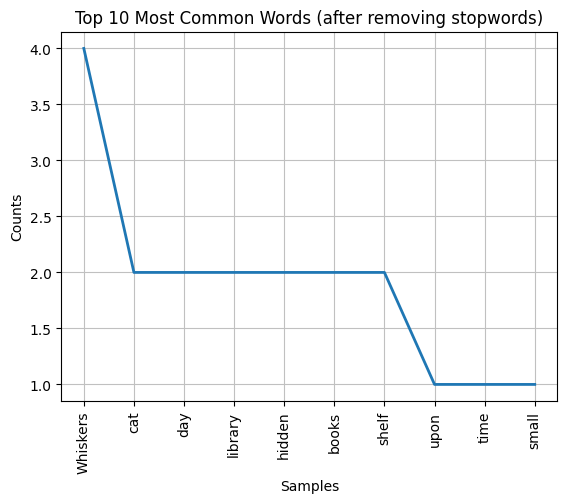

In [7]:
freq_dist = FreqDist(words_no_stop)
print("Frequency Distribution:\n")
for word, freq in freq_dist.most_common():
    print(f"{word}: {freq}")

# Optional: Plot the top 10 words
import matplotlib.pyplot as plt
freq_dist.plot(10, title='Top 10 Most Common Words (after removing stopwords)')

### Inference
The frequency distribution highlights the most important words in the story, which are likely to be the main subjects and actions.